In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:

# Create a DataFrame to store the data
data = pd.read_csv("SOCR-HeightWeight.csv")

# Display the first few rows of the dataset
print(data.head())


   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971


In [3]:
data = data.rename(columns={'Height(Inches)': 'Height', 'Weight(Pounds)': 'Weight'})

# # Drop the 'Index' column
#  data = data.drop(column='Index')

# Display the updated DataFrame
print(data)

       Index    Height    Weight
0          1  65.78331  112.9925
1          2  71.51521  136.4873
2          3  69.39874  153.0269
3          4  68.21660  142.3354
4          5  67.78781  144.2971
...      ...       ...       ...
24995  24996  69.50215  118.0312
24996  24997  64.54826  120.1932
24997  24998  64.69855  118.2655
24998  24999  67.52918  132.2682
24999  25000  68.87761  124.8742

[25000 rows x 3 columns]


In [4]:
#Lets Do Some Data Cleaning part 
data['Height'] = data['Height'].round(0)
data['Weight'] = data['Weight'].round(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   25000 non-null  int64  
 1   Height  25000 non-null  float64
 2   Weight  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [5]:
# check for unique values

# Assuming 'data' is your pandas DataFrame or Series object
unique_values = data['Height'].unique()

# Print unique values
print(unique_values)


[66. 72. 69. 68. 70. 67. 71. 63. 65. 64. 74. 73. 62. 75. 61. 60.]


In [6]:
# check for unique values

# Assuming 'data' is your pandas DataFrame or Series object
unique_values = data['Height'].unique()

# Print unique values
print(unique_values)


16
91


In [7]:
data['Height'].shape

(25000,)

In [13]:
data['Weight'].shape

(25000,)

Text(0, 0.5, 'Height')

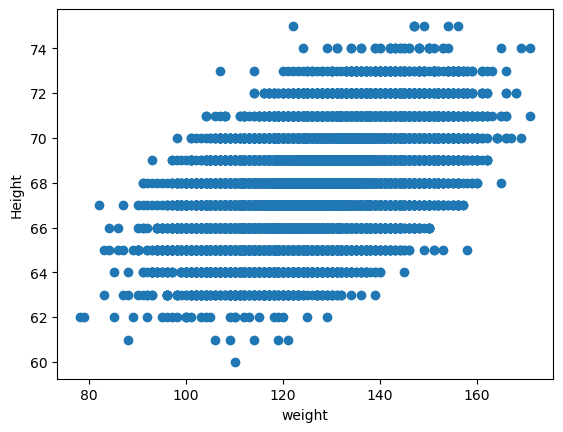

In [8]:
## Scatter plot
plt.scatter(data['Weight'],data['Height'])
plt.xlabel("weight")
plt.ylabel("Height")

In [9]:
data.corr()

,Index,Height,Weight
Index,1.000000,0.009290,-0.007376
Height,0.009290,1.000000,0.496756
Weight,-0.007376,0.496756,1.000000


C:\Users\khurr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


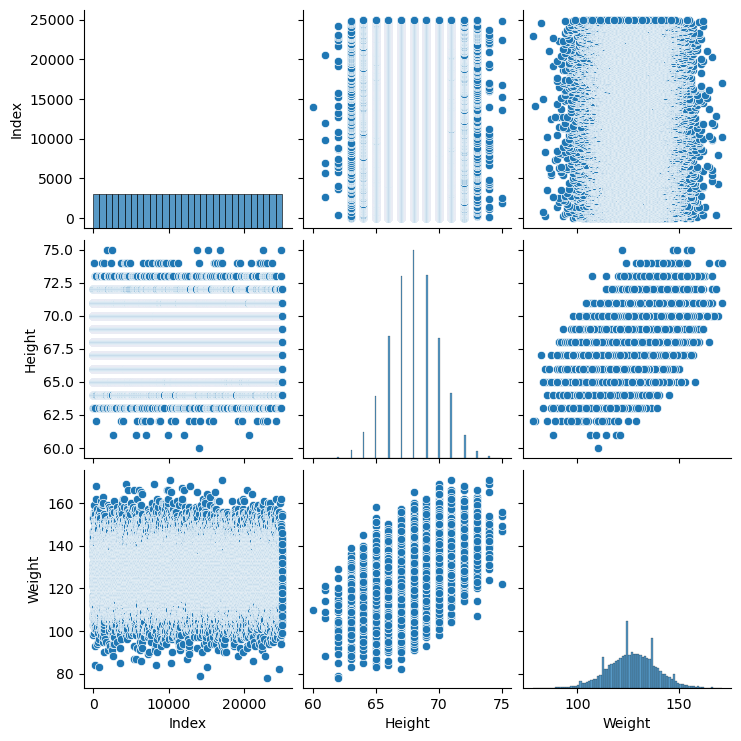

In [10]:
import seaborn as sns
sns.pairplot(data)

In [11]:
## to start with linear regression we need to convert data into dependent and 
# independent Features and i always has two dimension
x=data[['Weight']]
print(x)
x.shape

       Weight
0       113.0
1       136.0
2       153.0
3       142.0
4       144.0
...       ...
24995   118.0
24996   120.0
24997   118.0
24998   132.0
24999   125.0

[25000 rows x 1 columns]


(25000, 1)

In [36]:
data.head()

,Index,Height,Weight
0,1,66.0,113.0
1,2,72.0,136.0
2,3,69.0,153.0
3,4,68.0,142.0
4,5,68.0,144.0


In [ ]:
print(x)

In [14]:
y=data['Height']# this variable can be in series form or 1 d array

In [15]:
np.array(y).shape

(25000,)

In [16]:
# Now We will do a train and test split 
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.model_selection import train_test_split

# Assuming x and y are your feature and target variables respectively
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=70)


In [18]:
X_train.shape

(20000, 1)

In [19]:
# Standardization
# All data points has to be converted with meadn =0 and sd =1
from sklearn.preprocessing import StandardScaler


In [20]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [21]:
X_test=scaler.transform(X_test)

In [22]:
X_test

array([[ 0.93692196],
       [-0.77539875],
       [-0.09047046],
       ...,
       [-0.26170253],
       [-0.86101478],
       [ 0.33760971]])

In [23]:
## Apply Linear Regression
from sklearn.linear_model import LinearRegression


In [24]:
regression=LinearRegression()

In [25]:
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are your training features and target variable respectively
regression = LinearRegression(n_jobs=-1)

# Fit the regression model to the training data
regression.fit(X_train,Y_train)


LinearRegression(n_jobs=-1)

In [26]:
print("coeficient of slope:", regression.coef_)
print("Intercept:" ,regression.intercept_)

coeficient of slope: [0.95244366]
Intercept: 67.9904


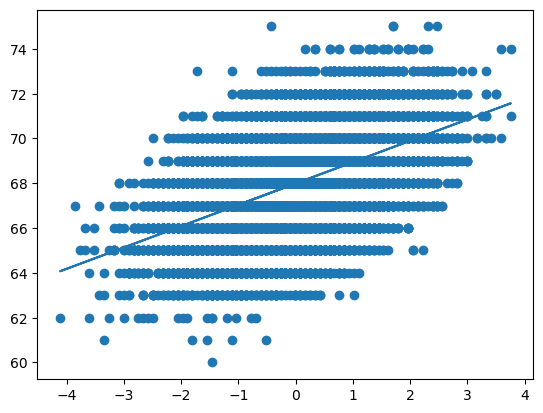

In [27]:
#plot Training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [28]:
## prediction for test data
# predicted height output=intercept+coeff_(weights)
# y_predicted_test=64.85+0.243(x_test)


In [29]:
# prediction for test Data
y_pred=regression.predict(X_test)

In [30]:
# performance Matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_true are the true target values and y_pred are the predicted values
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
rmse=np.sqrt(mse)
print("Root mean square error",rmse)

Mean Absolute Error: 1.3386455494137766
Mean Squared Error: 2.8001986221907775
Root mean square error 1.6733794017468895


In [31]:
# R square
from sklearn.metrics import r2_score

In [32]:
score=r2_score(Y_test,y_pred)
print(score)

0.2502637566572318


In [33]:
# prediction for new Data
regression.predict(scaler.transform([[80]]))

C:\Users\khurr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([64.1531873])

In [34]:
# prediction for new Data
regression.predict([[80]])

array([144.18589262])